# Natural Language Processing for Text Classification with NLTK and Scikit-learn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('spam.csv', encoding = 'latin1')

In [3]:
data = data.iloc[:,[0,1]]

In [4]:
data.columns = ["label", "message"]

In [5]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
data.groupby("label").describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [8]:
data["length"] = data["message"].apply(len)

In [9]:
data.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Message Length')]

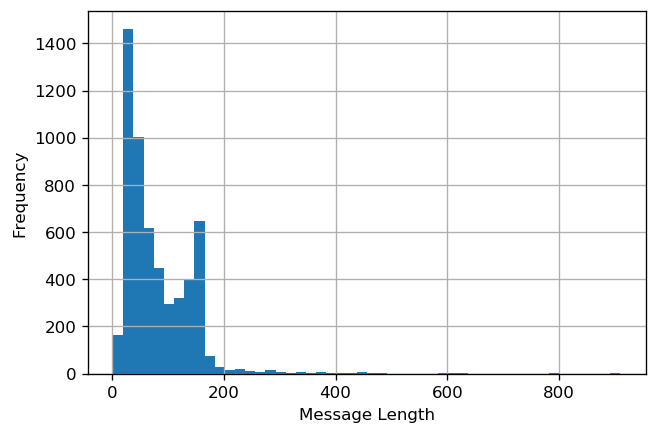

In [10]:
figure = plt.figure(dpi = 120)
axis = plt.axes()
data["length"].hist(bins = 50)
axis.set(xlabel = "Message Length", ylabel = "Frequency")

In [11]:
data["length"].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [12]:
data[data["length"] == 910]["message"].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CEC2EE0948>]],
      dtype=object)

<Figure size 720x480 with 0 Axes>

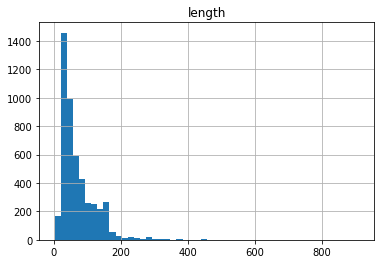

In [13]:
figure = plt.figure(dpi = 120)
data[data["label"] == "ham"].hist(bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CEC315EE48>]],
      dtype=object)

<Figure size 720x480 with 0 Axes>

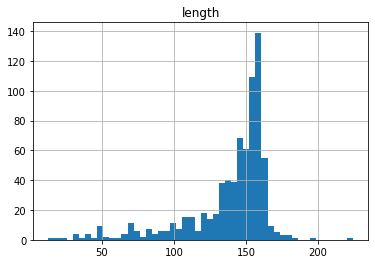

In [14]:
figure = plt.figure(dpi = 120)
data[data["label"] == "spam"].hist(bins = 50)

In [15]:
def processing_text(message):
    punctuation = [char for char in message 
                   if char not in string.punctuation]
    
    punctuation = ''.join(punctuation)
    
    clean_text = [word for word in punctuation.split()
                 if word.lower not in stopwords.words("english")]
    
    return clean_text    

In [16]:
data.head(5)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
data["message"].head(5).apply(processing_text)

0    [Go, until, jurong, point, crazy, Available, o...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, in, 2, a, wkly, comp, to, win, F...
3    [U, dun, say, so, early, hor, U, c, already, t...
4    [Nah, I, dont, think, he, goes, to, usf, he, l...
Name: message, dtype: object

In [18]:
transform = CountVectorizer(analyzer = processing_text).fit(data['message'])
print(len(transform.vocabulary_))

11625


In [19]:
data_test = data["message"][2]
data_test

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [20]:
transform_test = transform.transform([data_test])

In [21]:
print(transform_test)

  (0, 73)	1
  (0, 422)	1
  (0, 429)	1
  (0, 442)	1
  (0, 860)	1
  (0, 1567)	1
  (0, 1857)	2
  (0, 1961)	1
  (0, 2846)	1
  (0, 4023)	1
  (0, 4572)	1
  (0, 4854)	1
  (0, 5750)	1
  (0, 6468)	2
  (0, 6695)	1
  (0, 7476)	1
  (0, 9324)	1
  (0, 9365)	1
  (0, 9418)	1
  (0, 10693)	1
  (0, 10700)	3
  (0, 10867)	1
  (0, 11278)	1
  (0, 11318)	1


In [22]:
transform_test.shape

(1, 11625)

In [23]:
transform.get_feature_names()[1000]

'Accept'

In [24]:
messages_test = transform.transform(data["message"])

In [25]:
'Sparse Matrix Shape:',messages_test.shape

('Sparse Matrix Shape:', (5572, 11625))

In [26]:
'Non zero count:',messages_test.nnz

('Non zero count:', 78980)

In [27]:
sparsity = (100 * messages_test.nnz / 
            (messages_test.shape[0] * messages_test.shape[1]))
sparsity

0.12193069803703618

In [28]:
tfidf_transform = TfidfTransformer().fit(messages_test)

In [29]:
tfidf_test = tfidf_transform.transform(transform_test)

In [30]:
print(tfidf_test)

  (0, 11318)	0.1870552009428031
  (0, 11278)	0.15637127609507276
  (0, 10867)	0.1370333772195632
  (0, 10700)	0.1729441528523527
  (0, 10693)	0.2074604670418361
  (0, 9418)	0.15785053509224156
  (0, 9365)	0.22068062745524622
  (0, 9324)	0.22068062745524622
  (0, 7476)	0.07802797246527148
  (0, 6695)	0.18081393008946844
  (0, 6468)	0.3406409968665116
  (0, 5750)	0.18480334765260567
  (0, 4854)	0.1610897555829829
  (0, 4572)	0.06787345719827649
  (0, 4023)	0.15117792114016254
  (0, 2846)	0.1729106570222038
  (0, 1961)	0.14947092980264587
  (0, 1857)	0.44136125491049244
  (0, 1567)	0.21323541921013858
  (0, 860)	0.2074604670418361
  (0, 442)	0.21323541921013858
  (0, 429)	0.21323541921013858
  (0, 422)	0.09457652126483744
  (0, 73)	0.22068062745524622


In [31]:
tfidf_transform.idf_[transform.vocabulary_['u']]

3.288863056423095

In [32]:
tfidf_transform.idf_[transform.vocabulary_['university']]

8.527076498901426

In [33]:
message_tfidf = tfidf_transform.transform(messages_test)
message_tfidf.shape

(5572, 11625)

# Train The Model

In [34]:
from sklearn.naive_bayes import MultinomialNB
spam_detect = MultinomialNB().fit(message_tfidf, data['label'])

In [35]:
'Expected: ', spam_detect.predict(tfidf_test[0])

('Expected: ', array(['spam'], dtype='<U4'))

In [36]:
'Predicted: ', data.label[2]

('Predicted: ', 'spam')

In [37]:
## Correct Prediction

In [38]:
total_predictions = spam_detect.predict(message_tfidf)
total_predictions

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [39]:
from sklearn.metrics import classification_report
print(classification_report(data['label'], total_predictions))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      4825
        spam       1.00      0.80      0.89       747

    accuracy                           0.97      5572
   macro avg       0.98      0.90      0.94      5572
weighted avg       0.97      0.97      0.97      5572



In [40]:
from sklearn.model_selection import train_test_split
message_train, message_test, label_train,label_test = \
train_test_split(data['message'], data['label'], test_size = 0.2)

In [41]:
print(message_train.shape)
print(message_test.shape)

(4457,)
(1115,)


In [42]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('Text',CountVectorizer(analyzer = processing_text)),
                    ('tfidf',TfidfTransformer()),
                    ('classifying', MultinomialNB())])

In [43]:
pipeline.fit(message_train,label_train)

Pipeline(memory=None,
         steps=[('Text',
                 CountVectorizer(analyzer=<function processing_text at 0x000001CEC334E558>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifying',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [44]:
predict = pipeline.predict(message_test)
print(classification_report(predict,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.97      1016
        spam       0.66      1.00      0.79        99

    accuracy                           0.95      1115
   macro avg       0.83      0.97      0.88      1115
weighted avg       0.97      0.95      0.96      1115



In [45]:
accuracy = accuracy_score(predict,label_test)
accuracy*100

95.33632286995515

# Reached a accuracy of 95%